**FAST MRI**

In [ ]:
'''
function ClickConnect() {
    var buttons = document.querySelectorAll("colab-dialog.yes-no-dialog paper-button#cancel"); 
    buttons.forEach(function(btn) { 
        btn.click(); 
    }); 
    console.log("10분마다 자동 재연결"); 
    document.querySelector("colab-toolbar-button#connect").click(); 
} 
setInterval(ClickConnect,1000*60*10);
'''

'\nfunction ClickConnect() {\n    var buttons = document.querySelectorAll("colab-dialog.yes-no-dialog paper-button#cancel"); \n    buttons.forEach(function(btn) { \n        btn.click(); \n    }); \n    console.log("10분마다 자동 재연결"); \n    document.querySelector("colab-toolbar-button#connect").click(); \n} \nsetInterval(ClickConnect,1000*60*10);\n'

mount google drive to colab

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


path setting

In [2]:
%cd /content/drive/MyDrive/SNU_Challenge/Code/

/content/drive/MyDrive/SNU_Challenge/Code


train

In [ ]:
!python train.py \
-g 0 \
-b 4 \
-e 10 \
-lm 'False' \
-lr 1e-3 \
-lt 'plain' \
-r 500 \
-n 'test_SRResnet' \
-t '../Data/train/' \
-v '../Data/val/' \
-k 384 \
-nb 16 \
--in-chans 1 \
--out-chans 1 \
--input-key 'image_input' \
--target-key 'image_label' \
--max-key 'max'

Current cuda device:  0
Training model:  test_SRResnet
Building model:  test_SRResnet
1.0
Epoch # 0 ............... test_SRResnet ...............
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
Epoch = [  0/ 10] Iter = [   0/1291] Loss = 0.5666 Time = 1.4235s
Epoch = [  0/ 10] Iter = [ 500/1291] Loss = 0.1734 Time = 0.0808s
Epoch = [  0/ 10] Iter = [1000/1291] Loss = 0.1293 Time = 0.0821s


plot the result

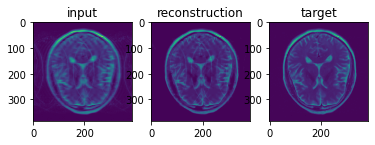

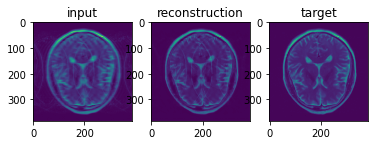

In [ ]:
import h5py
import matplotlib.pyplot as plt

f_u = h5py.File('../result/test_Unet/reconstructions_val/brain1_sample.h5', 'r')
f_ua = h5py.File('../result/test_Unet_advanced/reconstructions_val/brain1_sample.h5', 'r')

input_u = f_u['input']
recon_u = f_u['reconstruction']
target_u = f_u['target']
input_ua = f_ua['input']
recon_ua = f_ua['reconstruction']
target_ua = f_ua['target']

plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(input_u[1, :, :])
plt.title('input')
plt.subplot(1, 3, 2)
plt.imshow(recon_u[1, :, :])
plt.title('reconstruction')
plt.subplot(1, 3, 3)
plt.imshow(target_u[1, :, :])
plt.title('target')
plt.show()
plt.figure()
plt.subplot(1, 3, 1)
plt.imshow(input_ua[1, :, :])
plt.title('input')
plt.subplot(1, 3, 2)
plt.imshow(recon_ua[1, :, :])
plt.title('reconstruction')
plt.subplot(1, 3, 3)
plt.imshow(target_ua[1, :, :])
plt.title('target')
plt.show()